# O Desafio

O desafio consiste em 2 atividades com o objetivo de praticar os conceitos de coleta de dados, criação e manipulação de dados em banco relacional (MySQL) e não relacional (MongoDB).

A primeira atividade é a coleta dos dados do dataset dados_jogadores.csv, a criação de um banco de dados relacional MySQL, criação de uma estrutura de tabelas no banco de dados MySQL, avaliação e correção dos dados ausentes, inserção dos dados coletados na estrutura de tabelas criada e execução de comandos SQL para extração de informações da base de dados criada. O dataset dados_jogadores.csv é composto de dados estatísticos fictícios de jogadores 

A segunda atividade é a coleta dos dados do dataset lista_jogadores_chess.json, criação do banco de dados NoSQL usando MongoDB, criação de uma coleção no banco, inserção dos dados da lista de jogadores na coleção e consultas NoSQL para extrair informações sobre os dados no banco.

In [ ]:
#importando as bibliotecas necessárias
import pandas as pd

# Primeira atividade

In [ ]:
# leitura dos dados como um pandas dataframe
dados_jogadores = pd.read_csv('<caminho_do-arquivo>', sep = ';', encoding = '')

In [ ]:
# mostra os dados dos jogadores
dados_jogadores

,jogador,genero,data_nascimento,jogo,pais,num_vitorias,num_derrotas,total_partidas
0,jogador 1,Masculino,03/09/1990,Dama,Chile,14.0,0.0,14.0
1,Jogador 2,Feminino,01/05/1986,Jogo da velha,Chile,39.0,20.0,59.0
2,Jogador 3,Masculino,04/10/1964,Jogo da velha,Brasil,26.0,3.0,29.0
3,Jogador 4,Masculino,28/09/1979,Jogo da velha,Argentina,9.0,72.0,81.0
4,Jogador 5,Masculino,03/09/1978,Dama,Uruguai,1.0,54.0,55.0
...,...,...,...,...,...,...,...,...
494,Jogador 495,Feminino,03/06/1974,Dama,Chile,52.0,28.0,80.0
495,Jogador 496,Masculino,09/02/1959,Dama,Chile,13.0,51.0,64.0
496,Jogador 497,Masculino,06/01/1962,Jogo da velha,Argentina,57.0,NaN,80.0
497,Jogador 498,Masculino,28/09/1958,Jogo da velha,Chile,5.0,3.0,8.0


# Criação do schema e estrutura de tabelas no banco MySQL

O próximo passo é criar o schema/database e a estrutura de tabelas a partir da modelagem dos dados usando o diagrama entidade e relacionamento no banco MySQL. O diagrama construído encontra-se abaixo:


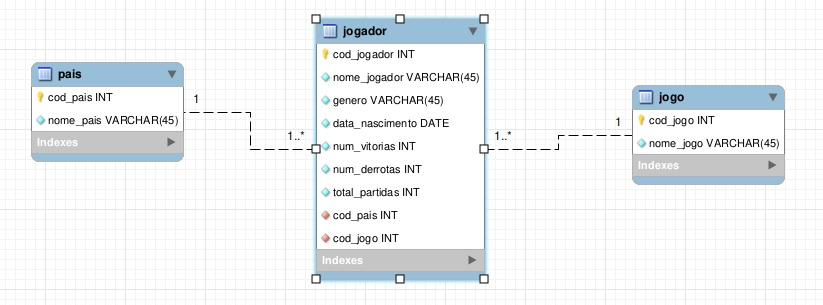




# Tratamento dos dados

Os dados serão analisados com mais detalhes para verificar se há dados ausentes e corrigí-los, caso necessário, antes de realizar a inserção no banco de dados.

In [ ]:
# mostra informações sobre o dataframe
dados_jogadores.info

<bound method DataFrame.info of          jogador     genero data_nascimento           jogo       pais  \
0      jogador 1  Masculino      03/09/1990           Dama      Chile   
1      Jogador 2   Feminino      01/05/1986  Jogo da velha      Chile   
2      Jogador 3  Masculino      04/10/1964  Jogo da velha     Brasil   
3      Jogador 4  Masculino      28/09/1979  Jogo da velha  Argentina   
4      Jogador 5  Masculino      03/09/1978           Dama    Uruguai   
..           ...        ...             ...            ...        ...   
494  Jogador 495   Feminino      03/06/1974           Dama      Chile   
495  Jogador 496  Masculino      09/02/1959           Dama      Chile   
496  Jogador 497  Masculino      06/01/1962  Jogo da velha  Argentina   
497  Jogador 498  Masculino      28/09/1958  Jogo da velha      Chile   
498  Jogador 499   Feminino      08/10/2004  Jogo da velha   Paraguai   

     num_vitorias  num_derrotas  total_partidas  
0            14.0           0.0          

In [ ]:
# mostra os dados ausentes
dados_jogadores.isna().sum()

jogador            0
genero             0
data_nascimento    0
jogo               0
pais               0
num_vitorias       8
num_derrotas       5
total_partidas     8
dtype: int64

In [ ]:
# busca dados ausentes da coluna 'num_vitorias'
dados_jogadores.loc[dados_jogadores['num_vitorias'].isna()]

,jogador,genero,data_nascimento,jogo,pais,num_vitorias,num_derrotas,total_partidas
46,Jogador 47,Masculino,31/01/1978,Dama,Uruguai,NaN,68.0,85.0
55,Jogador 56,Feminino,27/01/1959,Dama,Paraguai,NaN,29.0,80.0
97,Jogador 98,Feminino,16/04/1980,Dama,Paraguai,NaN,1.0,10.0
137,Jogador 138,Feminino,16/02/1963,Jogo da velha,Chile,NaN,28.0,44.0
251,Jogador 252,Masculino,18/08/1985,Jogo da velha,Chile,NaN,27.0,28.0
323,Jogador 324,Feminino,23/03/1994,Dama,Brasil,NaN,1.0,7.0
372,Jogador 373,Feminino,24/06/2000,Xadrez,Paraguai,NaN,49.0,60.0
492,Jogador 493,Feminino,21/09/2001,Jogo da velha,Uruguai,NaN,6.0,25.0


In [ ]:
# busca dados ausentes da coluna 'num_derrotas'
dados_jogadores.loc[dados_jogadores['num_derrotas'].isna()]

,jogador,genero,data_nascimento,jogo,pais,num_vitorias,num_derrotas,total_partidas
246,Jogador 247,Feminino,14/02/1954,Dama,Argentina,33.0,NaN,89.0
255,Jogador 256,Feminino,28/09/2000,Xadrez,Chile,1.0,NaN,73.0
287,Jogador 288,Masculino,01/02/1952,Xadrez,Brasil,3.0,NaN,17.0
336,Jogador 337,Masculino,13/06/1996,Dama,Argentina,36.0,NaN,64.0
496,Jogador 497,Masculino,06/01/1962,Jogo da velha,Argentina,57.0,NaN,80.0


In [ ]:
# busca dados ausentes da coluna 'total_partidas'
dados_jogadores.loc[dados_jogadores['total_partidas'].isna()]

,jogador,genero,data_nascimento,jogo,pais,num_vitorias,num_derrotas,total_partidas
71,Jogador 72,Masculino,27/03/2005,Dama,Paraguai,29.0,7.0,NaN
86,Jogador 87,Feminino,25/05/1975,Dama,Argentina,80.0,6.0,NaN
407,Jogador 408,Feminino,23/11/1970,Xadrez,Brasil,54.0,28.0,NaN
423,Jogador 424,Masculino,21/08/1998,Dama,Paraguai,47.0,30.0,NaN
453,Jogador 454,Feminino,21/10/2000,Dama,Paraguai,15.0,42.0,NaN
458,Jogador 459,Masculino,17/06/1999,Jogo da velha,Argentina,23.0,50.0,NaN
473,Jogador 474,Feminino,22/10/1977,Xadrez,Uruguai,24.0,4.0,NaN
490,Jogador 491,Masculino,27/05/1981,Dama,Argentina,16.0,1.0,NaN


A estratégia adotada para tratar os dados ausentes será substituí-los por zero no dataframe.

In [ ]:
# substituindo dados ausentes por 0 na coluna 'num_vitorias'
dados_jogadores.fillna(0, inplace = True)

In [ ]:
# verificando se ainda consta dados ausentes
dados_jogadores.isna().sum()

jogador            0
genero             0
data_nascimento    0
jogo               0
pais               0
num_vitorias       0
num_derrotas       0
total_partidas     0
dtype: int64

In [ ]:
# verifica o tipo dos dados
dados_jogadores.dtypes

jogador             object
genero              object
data_nascimento     object
jogo                object
pais                object
num_vitorias       float64
num_derrotas       float64
total_partidas     float64
dtype: object

# Conexão com o banco MySQL

O próximo passo é gerar a string de conexão com o banco e se conectar a ele.

In [ ]:
# importa as bibliotecas necessárias
import MySQLdb # biblioteca MySQL client
import sqlalchemy # biblioteca para conexão com o banco

In [ ]:
# função que gera a string de conexão
def gerar_string_conexao():
    user = '<digite-o-usuario>'
    password = '<digite-a-senha>'
    host = '<ip-do-host>'
    database = '<nome-do-banco-de-dados>'
    
    string_conexao = f'mysql://{user}:{password}@{host}/{database}'
    return string_conexao

In [ ]:
# conecta com o banco de dados
engine = sqlalchemy.create_engine(gerar_string_conexao())
conn = engine.connect()

# Preparação dos dados

Antes da inserção, é necessário preparar os dados, para que não haja dados duplicados e que eles estejam no formato desejado para serem inseridos no banco. 
A melhor forma de fazer isso é iniciar pelos dados que não possuem dependência de outros.

In [ ]:
# cria uma lista pois esses dados só tem uma coluna
df_pais = list(dados_jogadores['pais'].unique())
df_jogo = list(dados_jogadores['jogo'].unique()) 

In [ ]:
# mostra os dados de país
df_pais

['Chile', 'Brasil', 'Argentina', 'Uruguai', 'Paraguai']

In [ ]:
# mostra os dados de jogo
df_jogo

['Dama', 'Jogo da velha', 'Xadrez']

# Inserção dos dados no Banco

Primeiro, vamos inserir os dados dos dataframes df_pais e df_jogo que estão completos. 


In [ ]:
# inserindo os dados da lista df_pais
for pais in df_pais:
    try:
        query = f"""insert into pais (nome_pais)
                    values ('{pais}')"""
        conn.execute(query)
        print(f'Registro inserido com sucesso: {pais}')
    except Exception as e:
        print(f'Registro não foi inserido: {pais}. O erro encontrado foi {e}')

Registro inserido com sucesso: Chile
Registro inserido com sucesso: Brasil
Registro inserido com sucesso: Argentina
Registro inserido com sucesso: Uruguai
Registro inserido com sucesso: Paraguai


In [ ]:
# inserindo os dados da lista df_jogo
for jogo in df_jogo:
    try:
        query = f"""insert into jogo (nome_jogo)
                    values ('{jogo}')"""
        conn.execute(query)
        print(f'Registro inserido com sucesso: {jogo}')
    except Exception as e:
        print(f'Registro não foi inserido: {jogo}. O erro encontrado foi {e}')

Registro inserido com sucesso: Dama
Registro inserido com sucesso: Jogo da velha
Registro inserido com sucesso: Xadrez


Depois de inserir os dados que não possuem dependência de outros, pode-se trabalhar com os dados que possuem dependência. 

In [ ]:
# seleciona e remove os dados duplicados, pois precisamos de dados únicos
df_jogador = dados_jogadores[['jogador', 'genero', 'data_nascimento', 'num_vitorias', 'num_derrotas', 'total_partidas', 'pais', 'jogo']].drop_duplicates()


In [ ]:
# mostra os dados dos jogadores
df_jogador

,jogador,genero,data_nascimento,num_vitorias,num_derrotas,total_partidas,pais,jogo
0,jogador 1,Masculino,03/09/1990,14.0,0.0,14.0,Chile,Dama
1,Jogador 2,Feminino,01/05/1986,39.0,20.0,59.0,Chile,Jogo da velha
2,Jogador 3,Masculino,04/10/1964,26.0,3.0,29.0,Brasil,Jogo da velha
3,Jogador 4,Masculino,28/09/1979,9.0,72.0,81.0,Argentina,Jogo da velha
4,Jogador 5,Masculino,03/09/1978,1.0,54.0,55.0,Uruguai,Dama
...,...,...,...,...,...,...,...,...
494,Jogador 495,Feminino,03/06/1974,52.0,28.0,80.0,Chile,Dama
495,Jogador 496,Masculino,09/02/1959,13.0,51.0,64.0,Chile,Dama
496,Jogador 497,Masculino,06/01/1962,57.0,0.0,80.0,Argentina,Jogo da velha
497,Jogador 498,Masculino,28/09/1958,5.0,3.0,8.0,Chile,Jogo da velha


Antes de inserir os dados na tabela 'jogador' no banco MySQL, precisa-se importar as colunas 'cod_pais' da tabela 'pais' e 'cod_jogo' da tabela 'jogo' do banco de dados, pois elas são necessárias para a tabela 'jogador' também.

In [ ]:
# importando os dados da tabela 'pais'
df_pais = pd.read_sql('pais', con = conn)

In [ ]:
# mostra os dados importados da tabela pais
df_pais

,cod_pais,nome_pais
0,3,Argentina
1,2,Brasil
2,1,Chile
3,5,Paraguai
4,4,Uruguai


O próximo passo é mapear os dados da coluna 'pais' do df_jogador por meio dos códigos da coluna 'cod_pais' contidos no dataframe df_pais.

In [ ]:
dict_pais = df_pais.set_index(df_pais.nome_pais)['cod_pais'].to_dict() # convertendo para dicionário com o nome do país como chave e o código do país como valor
df_jogador['pais'] = df_jogador.pais.map(dict_pais) # mapeando os nomes dos países para código de país
df_jogador = df_jogador.rename(columns={'pais':'cod_pais'}) # renomeando a coluna 'pais' para 'cod_pais'

Repete-se o mesmo passo anterior, agora com os dados da tabela 'jogo'.

In [ ]:
# importando os dados da tabela 'jogo'
df_jogo = pd.read_sql('jogo', con = conn)
df_jogo

,cod_jogo,nome_jogo
0,1,Dama
1,2,Jogo da velha
2,3,Xadrez


In [ ]:
dict_jogo = df_jogo.set_index(df_jogo.nome_jogo)['cod_jogo'].to_dict() # convertendo para dicionário com o nome do jogo como chave e o código do jogo como valor
df_jogador['jogo'] = df_jogador.jogo.map(dict_jogo) # mapeando os nomes dos jogos para código de jogo
df_jogador = df_jogador.rename(columns={'jogo':'cod_jogo'}) # renomeando a coluna 'jogo' para 'cod_jogo'

In [ ]:
# mostra o tipo dos dados
df_jogador.dtypes

jogador             object
genero              object
data_nascimento     object
num_vitorias       float64
num_derrotas       float64
total_partidas     float64
pais                object
jogo                object
dtype: object

Como o banco MySQL só aceita inserção de datas do tipo ano/mês/dia, precisa-se converter os dados para esse formato. Isso será feito após percorrer todo o dataframe df_jogador, salvando os valores de cada coluna em variáveis. Assim, os dados já estarão preparados para serem inseridos em seguida.

In [ ]:
# importando a biblioteca datetime para trabalhar com datas
import datetime
from datetime import *

In [ ]:
for jogador in df_jogador[:3].itertuples():
    print(jogador)

Pandas(Index=0, jogador='jogador 1', genero='Masculino', data_nascimento='03/09/1990', num_vitorias=14.0, num_derrotas=0.0, total_partidas=14.0, cod_pais=1, cod_jogo=1)
Pandas(Index=1, jogador='Jogador 2', genero='Feminino', data_nascimento='01/05/1986', num_vitorias=39.0, num_derrotas=20.0, total_partidas=59.0, cod_pais=1, cod_jogo=2)
Pandas(Index=2, jogador='Jogador 3', genero='Masculino', data_nascimento='04/10/1964', num_vitorias=26.0, num_derrotas=3.0, total_partidas=29.0, cod_pais=2, cod_jogo=2)


In [ ]:
# inserindo os dados dos jogadores no banco 
for jogador in df_jogador.itertuples():
    nome_jogador = jogador.jogador
    genero = jogador.genero
    s_data_nasci = jogador.data_nascimento
    d_data_nasci = datetime.strptime(s_data_nasci, '%d/%m/%Y')
    data_nascimento = d_data_nasci.strftime('%Y-%m-%d')
    num_vitorias = jogador.num_vitorias
    num_derrotas = jogador.num_derrotas
    total_partidas = jogador.total_partidas
    cod_pais = jogador.cod_pais
    cod_jogo = jogador.cod_jogo
    
    try:
        query = f"""insert into jogador (nome_jogador, genero, data_nascimento, num_vitorias, num_derrotas, total_partidas, cod_pais, cod_jogo)
                   values ('{nome_jogador}','{genero}', '{data_nascimento}', '{num_vitorias}', '{num_derrotas}', '{total_partidas}', '{cod_pais}', '{cod_jogo}')"""
        conn.execute(query)
        print(f'Registro foi inserido com sucesso: {nome_jogador}')
    except Exception as e:
        print(f'Registro não foi inserido: {nome_jogador}. O erro encontrado foi {e}')


Registro foi inserido com sucesso: jogador 1
Registro foi inserido com sucesso: Jogador 2
Registro foi inserido com sucesso: Jogador 3
Registro foi inserido com sucesso: Jogador 4
Registro foi inserido com sucesso: Jogador 5
Registro foi inserido com sucesso: Jogador 6
Registro foi inserido com sucesso: Jogador 7
Registro foi inserido com sucesso: Jogador 8
Registro foi inserido com sucesso: Jogador 9
Registro foi inserido com sucesso: Jogador 10
Registro foi inserido com sucesso: Jogador 11
Registro foi inserido com sucesso: Jogador 12
Registro foi inserido com sucesso: Jogador 13
Registro foi inserido com sucesso: Jogador 14
Registro foi inserido com sucesso: Jogador 15
Registro foi inserido com sucesso: Jogador 16
Registro foi inserido com sucesso: Jogador 17
Registro foi inserido com sucesso: Jogador 18
Registro foi inserido com sucesso: Jogador 19
Registro foi inserido com sucesso: Jogador 20
Registro foi inserido com sucesso: Jogador 21
Registro foi inserido com sucesso: Jogador 

Registro foi inserido com sucesso: Jogador 184
Registro foi inserido com sucesso: Jogador 185
Registro foi inserido com sucesso: Jogador 186
Registro foi inserido com sucesso: Jogador 187
Registro foi inserido com sucesso: Jogador 188
Registro foi inserido com sucesso: Jogador 189
Registro foi inserido com sucesso: Jogador 190
Registro foi inserido com sucesso: Jogador 191
Registro foi inserido com sucesso: Jogador 192
Registro foi inserido com sucesso: Jogador 193
Registro foi inserido com sucesso: Jogador 194
Registro foi inserido com sucesso: Jogador 195
Registro foi inserido com sucesso: Jogador 196
Registro foi inserido com sucesso: Jogador 197
Registro foi inserido com sucesso: Jogador 198
Registro foi inserido com sucesso: Jogador 199
Registro foi inserido com sucesso: Jogador 200
Registro foi inserido com sucesso: Jogador 201
Registro foi inserido com sucesso: Jogador 202
Registro foi inserido com sucesso: Jogador 203
Registro foi inserido com sucesso: Jogador 204
Registro foi 

Registro foi inserido com sucesso: Jogador 367
Registro foi inserido com sucesso: Jogador 368
Registro foi inserido com sucesso: Jogador 369
Registro foi inserido com sucesso: Jogador 370
Registro foi inserido com sucesso: Jogador 371
Registro foi inserido com sucesso: Jogador 372
Registro foi inserido com sucesso: Jogador 373
Registro foi inserido com sucesso: Jogador 374
Registro foi inserido com sucesso: Jogador 375
Registro foi inserido com sucesso: Jogador 376
Registro foi inserido com sucesso: Jogador 377
Registro foi inserido com sucesso: Jogador 378
Registro foi inserido com sucesso: Jogador 379
Registro foi inserido com sucesso: Jogador 380
Registro foi inserido com sucesso: Jogador 381
Registro foi inserido com sucesso: Jogador 382
Registro foi inserido com sucesso: Jogador 383
Registro foi inserido com sucesso: Jogador 384
Registro foi inserido com sucesso: Jogador 385
Registro foi inserido com sucesso: Jogador 386
Registro foi inserido com sucesso: Jogador 387
Registro foi 

# Criação da tabela staging

A partir dos dados coletados através do dataframe dados_jogadores, que não passam por nenhum tipo de tratamento, será criado a tabela de staging no banco, que é uma tabela de preparação temporária usada para preparar os dados para ambientes de análise. 

In [ ]:
# criação da tabela staging stg_jogadores
dados_jogadores.to_sql('stg_jogadores', con = conn, schema = 'dbjogadores')

# Segunda atividade


In [1]:
# importação das bibliotecas necessárias
import json

In [2]:
# leitura dos dados do arquivo json
with open('<caminho-do-arquivo>', 'r') as file:
    arquivo = file.read()

In [3]:
# carregamento do arquivo na variável
dados_json = json.loads(arquivo)

In [4]:
#verificando estrutura de chaves do arquivo json
dados_json.keys()

dict_keys(['user'])

# Conexão com o banco MongoDB

É utilizado nesse projeto o banco MongoDB na nuvem que é o MongoDB Altas, sem a necessidade de instalação do mesmo na máquina.

In [ ]:
# instalando pacote para conexão com banco MongoDB
!pip install pymongo

In [ ]:
# instalando pacote com modulo dnspython para conexão com o banco
!pip install pymongo[srv]

In [1]:
# importando mongoclient para conexão e manipulação de dados no MongoDB
from pymongo import MongoClient

In [2]:
# biblioteca para codificação de dados de acesso ao Cluster MongoDB Atlas
from urllib.parse import quote_plus

username = quote_plus('<usuario-do-cluster>')
password = quote_plus('<senha-do-cluster>')

In [3]:
# criando conexão com o Cluster criado no MongoDB Altas
client = MongoClient(f'mongodb+srv://{username}:{password}@<nome-do-cluster>.avhay.mongodb.net/?retryWrites=true&w=majority')
db = client.test # teste de conexão

# Criação do banco de dados Chess

In [6]:
# cria base de dados/database chess
db = client.chess

# Criação da Coleção Jogadores

In [9]:
# cria nova coleção chamada jogadores no banco chess
collection = db.jogadores

# Inserção dos dados no banco

In [ ]:
# inserindo dados do arquivo JSON dentro da coleção jogadores no MongoDB 
for dado in dados_json['user']:
    dado_id = collection.insert_one(dado) # gera um id automaticamente para o dado inserido
    dado_id.inserted_id

# Consulta dos dados

In [4]:
# biblioteca que facilita a consulta dos dados
import pprint

In [7]:
# verificando quantidade de registros dentro da coleção
db.jogadores.estimated_document_count()

1332

In [ ]:
# visualizando dados inseridos na coleção jogadores
for dados in db.jogadores.find():
    pprint.pprint(dados)

{'@id': 'https://api.chess.com/pub/player/123lt',
 '_id': ObjectId('62a231895f9b248c61b73139'),
 'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/18800602.e26b721f.200x200o.e738019a328a.jpeg',
 'country': 'https://api.chess.com/pub/country/CN',
 'followers': 36,
 'is_streamer': False,
 'joined': 1410059361,
 'last_online': 1615967972,
 'name': 'Tingjie Lei',
 'player_id': 18800602,
 'status': 'premium',
 'title': 'GM',
 'url': 'https://www.chess.com/member/123lt',
 'username': '123lt'}
{'@id': 'https://api.chess.com/pub/player/124chess',
 '_id': ObjectId('62a235655f9b248c61b7313b'),
 'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/29499974.39041f89.200x200o.f6478a5ae8e2.jpeg',
 'country': 'https://api.chess.com/pub/country/RU',
 'followers': 87,
 'is_streamer': False,
 'joined': 1471316272,
 'last_online': 1616173422,
 'location': 'Красноярск',
 'name': 'Дмитрий Хегай',
 'player_id': 29499974,
 'status': 'premium',
 'title': 'GM',
 'url': 'https://www.chess.com/m

{'@id': 'https://api.chess.com/pub/player/arthurkogan',
 '_id': ObjectId('62a235765f9b248c61b7319f'),
 'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/40525990.aec33e5a.200x200o.d5835fab41db.jpeg',
 'country': 'https://api.chess.com/pub/country/ES',
 'followers': 14,
 'is_streamer': False,
 'joined': 1511098082,
 'last_online': 1616240842,
 'name': 'Arthur Kogan',
 'player_id': 40525990,
 'status': 'premium',
 'title': 'GM',
 'url': 'https://www.chess.com/member/arthurkogan',
 'username': 'arthurkogan'}
{'@id': 'https://api.chess.com/pub/player/art_vandelay1980',
 '_id': ObjectId('62a235765f9b248c61b731a0'),
 'country': 'https://api.chess.com/pub/country/HR',
 'followers': 9,
 'is_streamer': False,
 'joined': 1582493334,
 'last_online': 1616086168,
 'location': 'Zagreb',
 'name': 'Hrvoje Stevic',
 'player_id': 72601922,
 'status': 'premium',
 'title': 'GM',
 'url': 'https://www.chess.com/member/Art_Vandelay1980',
 'username': 'art_vandelay1980'}
{'@id': 'https://api.chess.c

{'@id': 'https://api.chess.com/pub/player/eljanov',
 '_id': ObjectId('62a235a25f9b248c61b7329c'),
 'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/17411344.835ac3fe.200x200o.5e4acd7111ce.jpeg',
 'country': 'https://api.chess.com/pub/country/UA',
 'followers': 448,
 'is_streamer': True,
 'joined': 1400865696,
 'last_online': 1616201455,
 'location': 'Kharkov, Ukraine',
 'name': 'Pavel Eljanov',
 'player_id': 17411344,
 'status': 'premium',
 'title': 'GM',
 'twitch_url': 'https://twitch.tv/eljanovlive',
 'url': 'https://www.chess.com/member/eljanov',
 'username': 'eljanov'}
{'@id': 'https://api.chess.com/pub/player/elliotstabler',
 '_id': ObjectId('62a235a25f9b248c61b7329d'),
 'country': 'https://api.chess.com/pub/country/US',
 'followers': 0,
 'is_streamer': False,
 'joined': 1551807383,
 'last_online': 1551818758,
 'location': 'New Yark City',
 'player_id': 58130342,
 'status': 'premium',
 'title': 'GM',
 'url': 'https://www.chess.com/member/ElliotStabler',
 'username': 'el

{'@id': 'https://api.chess.com/pub/player/jessekraai',
 '_id': ObjectId('62a235d85f9b248c61b733cd'),
 'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/13889206.4e675ae6.200x200o.7a9bee1c992c.jpeg',
 'country': 'https://api.chess.com/pub/country/US',
 'followers': 295,
 'is_streamer': True,
 'joined': 1381696405,
 'last_online': 1616173995,
 'location': 'United States',
 'name': 'Jesse Kraai',
 'player_id': 13889206,
 'status': 'premium',
 'title': 'GM',
 'twitch_url': 'https://twitch.tv/jessekraai',
 'url': 'https://www.chess.com/member/JesseKraai',
 'username': 'jessekraai'}
{'@id': 'https://api.chess.com/pub/player/jesspinkman',
 '_id': ObjectId('62a235d95f9b248c61b733ce'),
 'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/17428284.9bbfe9a8.200x200o.bf67ba6594be.jpeg',
 'country': 'https://api.chess.com/pub/country/US',
 'followers': 1,
 'is_streamer': False,
 'joined': 1400977928,
 'last_online': 1616243008,
 'name': 'Daniel Alsina',
 'player_id': 17428284,
 's

{'@id': 'https://api.chess.com/pub/player/openyagami',
 '_id': ObjectId('62a2360d5f9b248c61b734fe'),
 'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/29655420.01868a3f.200x200o.2053232422b7.jpeg',
 'country': 'https://api.chess.com/pub/country/US',
 'followers': 91,
 'is_streamer': False,
 'joined': 1472260658,
 'last_online': 1616197423,
 'location': 'Brownsville',
 'name': 'Vladimir Belous',
 'player_id': 29655420,
 'status': 'premium',
 'title': 'GM',
 'url': 'https://www.chess.com/member/Openyagami',
 'username': 'openyagami'}
{'@id': 'https://api.chess.com/pub/player/oskariot',
 '_id': ObjectId('62a2360d5f9b248c61b734ff'),
 'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/18510608.8c7f0777.200x200o.765b3ad7d025.jpeg',
 'country': 'https://api.chess.com/pub/country/XX',
 'followers': 342,
 'is_streamer': False,
 'joined': 1408136764,
 'last_online': 1616191580,
 'name': 'Oskar Wieczorek',
 'player_id': 18510608,
 'status': 'premium',
 'title': 'GM',
 'url': '

 'joined': 1426537817,
 'last_online': 1614750758,
 'location': 'Santiago',
 'name': 'Cristobal Henriquez',
 'player_id': 21547754,
 'status': 'premium',
 'title': 'GM',
 'url': 'https://www.chess.com/member/ViIIagra',
 'username': 'viiiagra'}
{'@id': 'https://api.chess.com/pub/player/vincentkeymer',
 '_id': ObjectId('62a236415f9b248c61b73626'),
 'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/43194690.01e2e420.200x200o.5b2983036718.jpeg',
 'country': 'https://api.chess.com/pub/country/DE',
 'followers': 947,
 'is_streamer': False,
 'joined': 1518259553,
 'last_online': 1616235344,
 'location': 'Saulheim',
 'name': 'Vincent Keymer',
 'player_id': 43194690,
 'status': 'premium',
 'title': 'GM',
 'url': 'https://www.chess.com/member/VincentKeymer',
 'username': 'vincentkeymer'}
{'@id': 'https://api.chess.com/pub/player/vincentmasuka',
 '_id': ObjectId('62a236415f9b248c61b73627'),
 'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/4433329.3a315c21.200x200o.82e02dc9eb

In [34]:
# Quantos jogadores são de Portugal?
db.jogadores.count_documents({'country': 'https://api.chess.com/pub/country/PT'})

2

In [16]:
# Quantos seguidores possui o jogador Rafael Leitão?
for dado in db.jogadores.find({'name': 'Rafael Leitao'},{'followers'}):
    pprint.pprint(dado)

{'_id': ObjectId('62a235bf5f9b248c61b7333b'), 'followers': 1707}


In [33]:
# Quantas pessoas são streamer?
db.jogadores.count_documents({'is_streamer' : True})


66

In [ ]:
# Quais status distintos possui o dataset Chess?
for dado in db.jogadores.distinct('status'):
    pprint.pprint(dado)

'basic'
'premium'
'staff'


In [32]:
# Quantos países distintos possui a base de dados?
contador = 0
for dado in db.jogadores.distinct('country'):
    contador += 1
print(contador)

102


In [22]:
# Quais são os jogadores que possuem mais que 30.000 seguidores?
for dado in db.jogadores.find({'followers': {'$gte': 30000}}, {'name'}):
    pprint.pprint(dado)

{'_id': ObjectId('62a235b35f9b248c61b732fd'), 'name': 'Simon Williams'}
{'_id': ObjectId('62a235cd5f9b248c61b7338c'), 'name': 'Hikaru Nakamura'}
{'_id': ObjectId('62a235f25f9b248c61b73466'), 'name': 'Magnus Carlsen'}


In [23]:
# Quantas pessoas possuem o status staff?
db.jogadores.count_documents({'status': 'staff'})

8

In [39]:
# Qual a sigla do país do jogador George Giorgadze?
for dado in db.jogadores.find({'name': 'George Giorgadze'}, {'country'}):
    pprint.pprint(dado)

{'_id': ObjectId('62a235b05f9b248c61b732f1'),
 'country': 'https://api.chess.com/pub/country/GE'}


In [40]:
# Qual a localização do jogador Magnus Carlsen?
for dado in db.jogadores.find({'name': 'Magnus Carlsen'}, {'location'}):
    pprint.pprint(dado)

{'_id': ObjectId('62a235f25f9b248c61b73466'), 'location': 'Norway'}
